#**Text Summarizer**

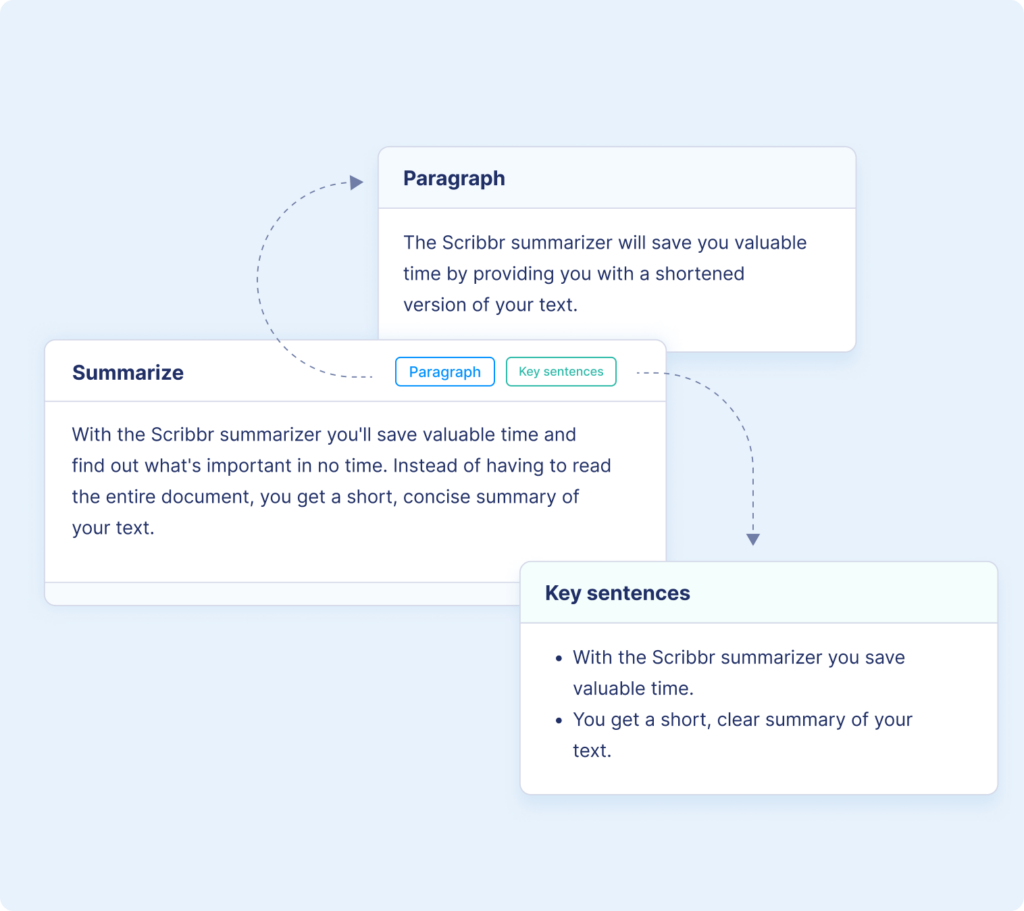

In [ ]:
#install libraries
pip install transformers datasets sentencepiece torch evaluate rouge_score

In [28]:
#import neccessary libraries
from transformers import T5Tokenizer, T5ForConditionalGeneration
import numpy as np
import evaluate

In [37]:
# Load model and tokenizer
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

In [45]:
# User input text
article = input("Paste your text here:\n")

Paste your text here:
The safety practices of major artificial intelligence companies, such as Anthropic, OpenAI, xAI and Meta, are “far short of emerging global standards,” according to a new edition of Future of Life Institute’s AI safety index released on Wednesday.  The institute said the safety evaluation, conducted by an independent panel of experts, found that while the companies were busy racing to develop superintelligence, none had a robust strategy for controlling such advanced systems.  The study comes amid heightened public concern about the societal impact of smarter-than-human systems capable of reasoning and logical thinking, after several cases of suicide and self-harm were tied to AI chatbots.


In [46]:
def chunk_text(text, max_tokens=600):
    words = text.split()
    for i in range(0, len(words), max_tokens):
        yield " ".join(words[i : i + max_tokens])

In [47]:
# Process input
chunk_summaries = []
for chunk in chunk_text(article, max_tokens=600):
    input_text = "summarize: " + chunk
    inputs = tokenizer.encode(input_text, return_tensors="pt", truncation=True)

    summary_ids = model.generate(inputs, max_length=120, min_length=30)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    chunk_summaries.append(summary)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [48]:
final_input = "summarize: " + " ".join(chunk_summaries)
final_ids = model.generate(tokenizer.encode(final_input, return_tensors="pt"),
                            max_length=150, min_length=40)
final_summary = tokenizer.decode(final_ids[0], skip_special_tokens=True)

print(final_summary)

print("\nInput Text :", article)
print("\nArticle Length :", len(article))
print("\nSummary:\n", summary)
print("\nSummary length:", len(summary))

future of life institute releases its AI safety index . it finds that none of the companies have a robust strategy for controlling them . study comes amid public concern about the societal impact of smarter-than-human systems .

Input Text : The safety practices of major artificial intelligence companies, such as Anthropic, OpenAI, xAI and Meta, are “far short of emerging global standards,” according to a new edition of Future of Life Institute’s AI safety index released on Wednesday.  The institute said the safety evaluation, conducted by an independent panel of experts, found that while the companies were busy racing to develop superintelligence, none had a robust strategy for controlling such advanced systems.  The study comes amid heightened public concern about the societal impact of smarter-than-human systems capable of reasoning and logical thinking, after several cases of suicide and self-harm were tied to AI chatbots.

Article Length : 698

Summary:
 future of life institute r

In [50]:
texts = [
    "Electric vehicles are becoming more affordable as battery technology improves worldwide.",
    "Researchers have developed a new biodegradable plastic that decomposes faster and reduces environmental pollution significantly.",
    "Scientists recently discovered a new exoplanet located in the habitable zone of its star. Early observations show that the planet may contain liquid water, increasing the possibility of supporting life.",
    "Online learning platforms have surged in popularity over the past few years. Students now have access to thousands of courses across different fields, enabling flexible and self-paced education without geographical limitations.",
    "Urban cities around the world are adopting smart traffic systems powered by AI. These systems analyze real-time vehicle data to reduce congestion, optimize signal timings, and improve overall road safety for both drivers and pedestrians.",
    "Renewable energy adoption has increased dramatically with the rapid expansion of solar and wind farms. Governments and private companies are investing heavily in green technologies to combat climate change and build sustainable energy infrastructure for the future."
]

reference_summaries = [
    "Electric vehicles are becoming cheaper due to improvements in battery technology.",
    "Scientists created a biodegradable plastic that breaks down faster and helps reduce environmental pollution.",
    "A newly found exoplanet in its star’s habitable zone may have liquid water, raising the chance of supporting life.",
    "Online learning platforms now allow students worldwide to access flexible, self-paced courses in many fields.",
    "Cities are using AI-based traffic systems to cut congestion, optimize signals, and improve road safety.",
    "Solar and wind energy adoption is rising as governments invest in green technologies to fight climate change."
]

generated_summaries = []

for text in texts:
    input_text = "summarize: " + text
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True)

    summary_ids = model.generate(
        inputs,
        max_length=80,
        min_length=10,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )

    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    generated_summaries.append(generated_summary)


In [51]:
# Evaluate
rouge = evaluate.load("rouge")

results = rouge.compute(
    predictions=generated_summaries,
    references=reference_summaries
)

print("\nROUGE Scores:\n", results)


ROUGE Scores:
 {'rouge1': np.float64(0.53264014845724), 'rouge2': np.float64(0.23951144820710038), 'rougeL': np.float64(0.4513738905605473), 'rougeLsum': np.float64(0.4513738905605473)}


In [52]:
model.save_pretrained('./fine_tuned_model')
tokenizer.save_pretrained('./fine_tuned_model')

('./fine_tuned_model/tokenizer_config.json',
 './fine_tuned_model/special_tokens_map.json',
 './fine_tuned_model/spiece.model',
 './fine_tuned_model/added_tokens.json')